# Práctica Clase 5

## Ejercicio integrador

Observación: 

>Les recomiendo que para los polinomios de grado elevado, no usen SD/SDG/Mini-Batch porque van a encontrar problemas numêricos. En las próximas clases vamos a hablar de esos problemas numéricos y como solucionarlos.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../")
from libintroia import *

1. Simular una función sin(x) con ruido.

In [2]:
N_SAMPLES = 1000
N_PERIODS = 2
NOISE_K = 0.3
x = np.linspace(0,N_PERIODS*(2*np.pi),N_SAMPLES)
y = np.sin(x) + np.random.uniform(low=-NOISE_K,high=NOISE_K,size=N_SAMPLES)

2. Hacer el gráfico de los datos.

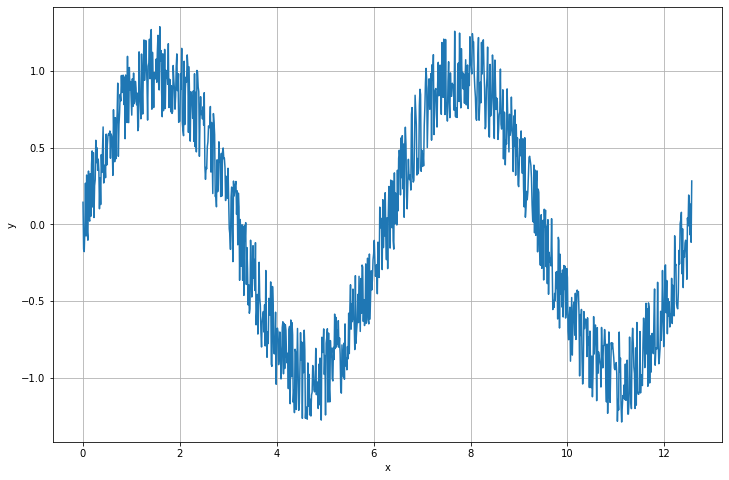

In [3]:
plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.grid(which="Both")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
def plot_model_results(x,y,model_results):
    plt.figure(figsize=(12,8))
    plt.plot(x,y,'o')
    legend= ["Noisy"]
    for m in model_results:
        plt.plot(m["x"],m["y"],'.')
        legend.append(m["legend"])
    plt.grid(which="Both")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(legend)
    plt.show()

3. Hacer fit con y = w1 X + w2.

In [5]:
model = LinearRegression()
model_results = []

# Linear
x_linear = np.vstack((x, np.ones(len(x)))).T
model.fit(x_linear, y.reshape(-1, 1))
w = model.get_model()
y_hat_linear = w[0]*x+w[1]
model_results.append(
    {
        "x": x,
        "y": y_hat_linear,
        "legend": "linear"
    }
)

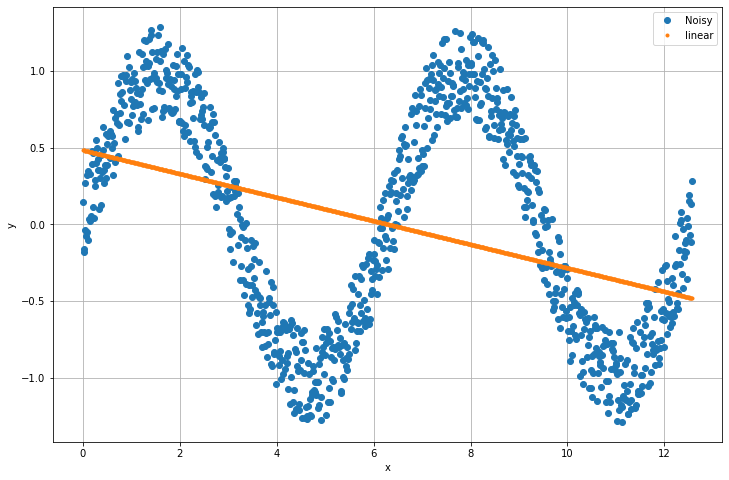

In [6]:
plot_model_results(x,y,model_results)

4. Hacer fit con y = w1 X^2 + w2 X + w3.

In [7]:
# Cuadratic
x_cuadratic = np.vstack(
    ( x**2,x, np.ones(len(x)) )
).T
model.fit(x_cuadratic, y.reshape(-1, 1))
w = model.get_model()
y_hat_cubic = w[0]*x**2 + w[1]*x + w[2]
model_results.append(
    {
        "x": x,
        "y": y_hat_cubic,
        "legend": "Cuadratic"
    }
)

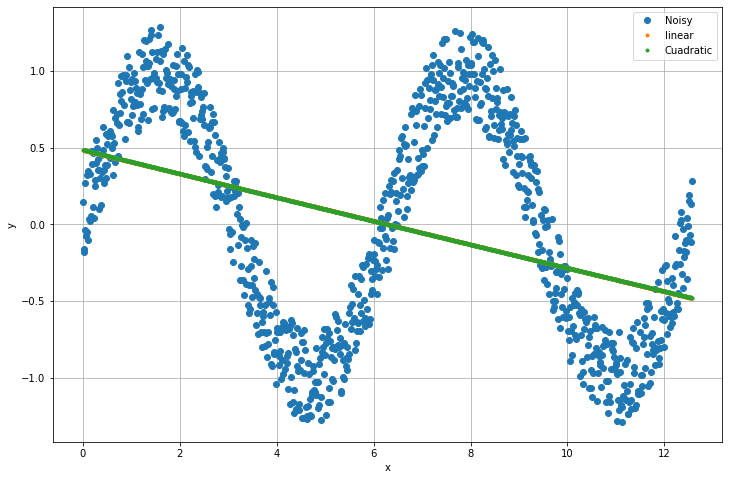

In [8]:
plot_model_results(x,y,model_results)

5. Hacer fir para diferentes polinomios hasta 10.

In [9]:
coeffs = [3,4,5,6,7,8,9,10]
x_coeffs = []
y_hat_coeffs = []
for coeff in coeffs:
    x_acc = []
    for c in range(coeff):
            x_acc.append(x**(coeff-c))
    xx = np.vstack(x_acc).T
    model.fit(xx, y.reshape(-1, 1))
    w = model.get_model()
    y_hat = 0
    for c in range(coeff):
        y_hat += w[c]*x**(coeff-c)
    y_hat_coeffs.append(y_hat)
    model_results.append(
    {
        "x": x,
        "y": y_hat,
        "legend": f"x{coeff}"
    }
)
    

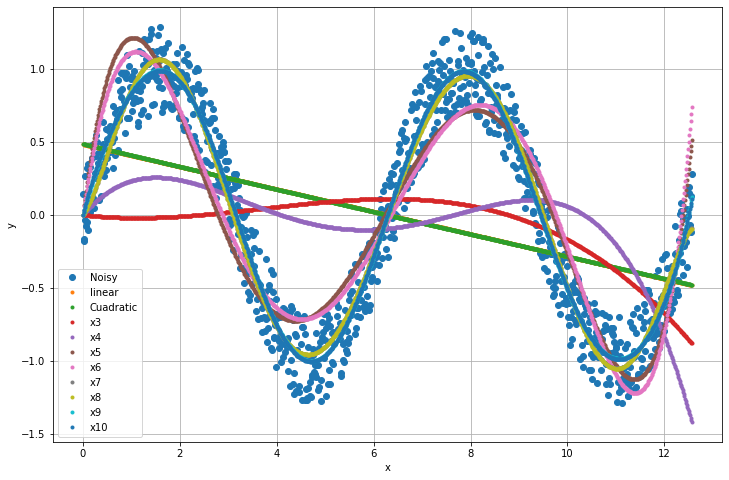

In [10]:
plot_model_results(x,y,model_results)

6. Obtener mediante cross-validation para cada polinomio el error de validación (k-folds).

In [11]:
#TODO

def k_folds(X_train, y_train, k=5):
    l_regression = LinearRegression()
    error = MSE()

    chunk_size = int(len(X_train) / k)
    mse_list = []
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        l_regression.fit(new_X_train, new_y_train)
        prediction = l_regression.predict(new_X_valid)
        mse_list.append(error(new_y_valid, prediction))

    mean_MSE = np.mean(mse_list)

    return mean_MSE

7. Seleccionar el modelo con complejidad correcta para el dataset (usando el modelo que minimiza el validation error obtenido en 6).

In [12]:
#TODO

8. Obtener el ECM sobre el dataset de test.

In [13]:
#TODO

class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

9. Regularizar el modelo para mejorar la generalización del modelo (probar agregando mas ruido al sin(x)).

In [14]:
#TODO